In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

======================================== sepal_length ========================================


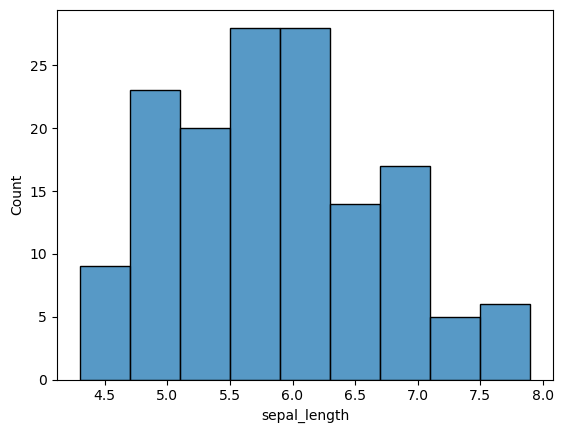

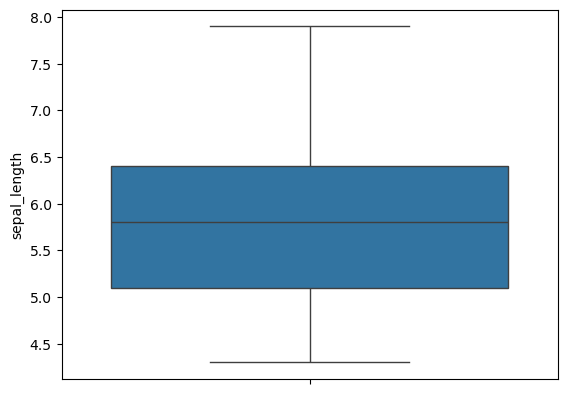

======================================== sepal_width ========================================


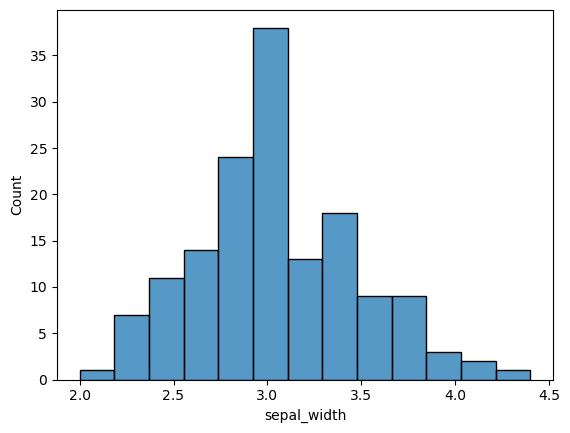

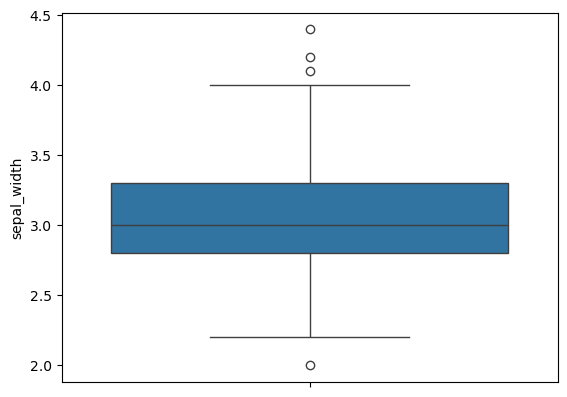

======================================== petal_length ========================================


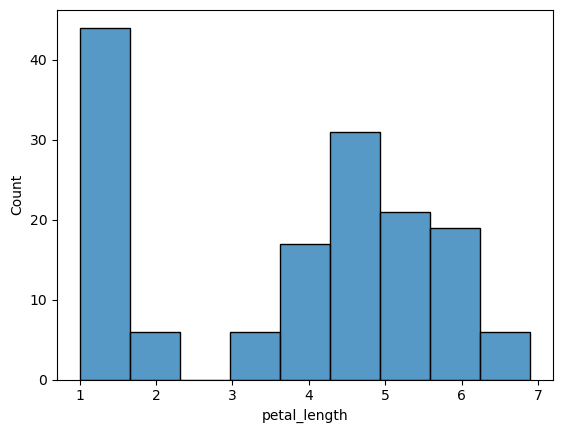

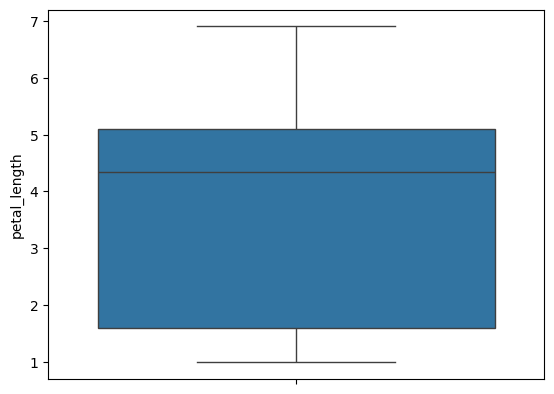

======================================== petal_width ========================================


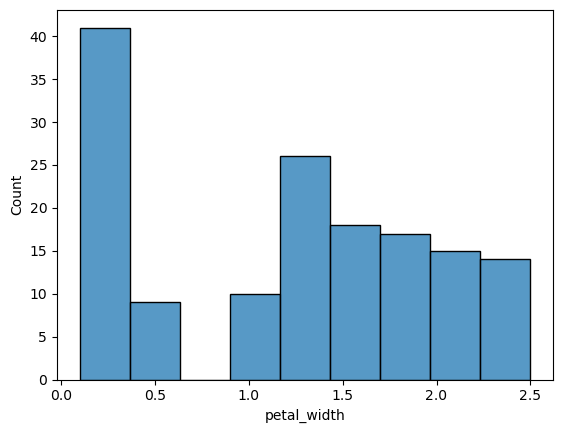

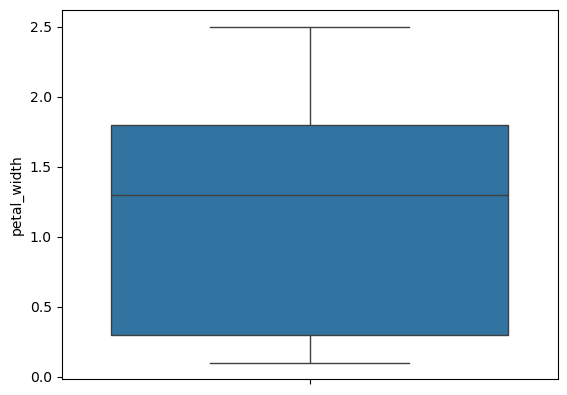

======================================== species ========================================


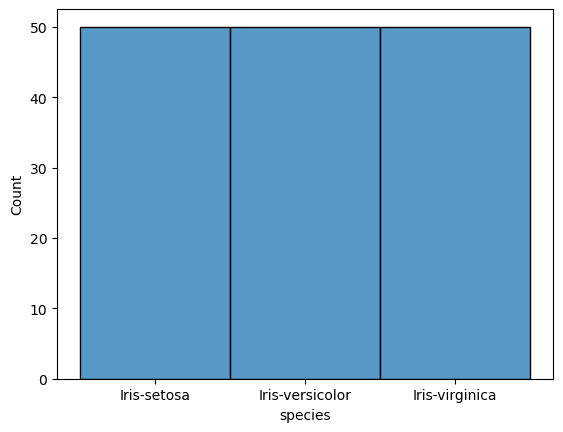

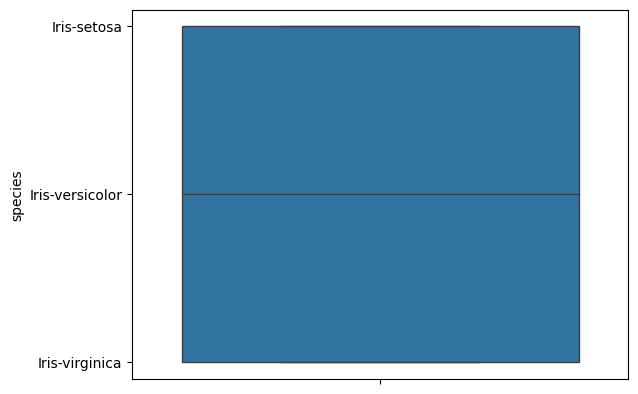

In [7]:
for col in data:
    print("=" *40, col, "=" *40)
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data[col])
    plt.show()

In [8]:
X = data.drop("species", axis=1)
y = data["species"]

* label encoding으로 변환(sparse_categorical_crossentropy) 
* one-hot encoding 변환(categorical_crossentropy)

In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [10]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mms = MinMaxScaler()
mms.fit(X_train)
mms_X_train = mms.transform(X_train)
mms_X_test = mms.transform(X_test)
mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index)

In [16]:
mms_X_train

,sepal_length,sepal_width,petal_length,petal_width
22,0.088235,0.666667,0.000000,0.041667
15,0.411765,1.000000,0.087719,0.125000
65,0.705882,0.458333,0.596491,0.541667
11,0.147059,0.583333,0.105263,0.041667
42,0.029412,0.500000,0.052632,0.041667
...,...,...,...,...
71,0.529412,0.333333,0.526316,0.500000
106,0.176471,0.208333,0.614035,0.666667
14,0.441176,0.833333,0.035088,0.041667
92,0.441176,0.250000,0.526316,0.458333


In [17]:
mms_X_test

,sepal_length,sepal_width,petal_length,petal_width
73,0.529412,0.333333,0.649123,0.458333
18,0.411765,0.750000,0.122807,0.083333
118,1.000000,0.250000,1.035088,0.916667
78,0.500000,0.375000,0.614035,0.583333
76,0.735294,0.333333,0.666667,0.541667
31,0.323529,0.583333,0.087719,0.125000
64,0.382353,0.375000,0.456140,0.500000
141,0.764706,0.458333,0.719298,0.916667
68,0.558824,0.083333,0.614035,0.583333
82,0.441176,0.291667,0.508772,0.458333


# 텐서프로우로 다중분류 분석하기

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report

In [27]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 다중분류시에는 출력층의 클래스 수 만큼 node를 주어야 함, 활성함수는 softmax
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step - accuracy: 0.3167 - loss: 1.0959 - val_accuracy: 0.3667 - val_loss: 1.0784
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3000 - loss: 1.0846 - val_accuracy: 0.4333 - val_loss: 1.0727
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3500 - loss: 1.0779 - val_accuracy: 0.4667 - val_loss: 1.0679
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4083 - loss: 1.0717 - val_accuracy: 0.4667 - val_loss: 1.0639
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3750 - loss: 1.0658 - val_accuracy: 0.3667 - val_loss: 1.0602
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3917 - loss: 1.0606 - val_accuracy: 0.3000 - val_loss: 1.0561
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4083 - loss: 1.0552 - val_accuracy: 0.3000 - val_loss: 1.0519
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3833 - loss: 1.0500 - val_accuracy: 0.3667 - val_loss

Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6750 - loss: 0.6637 - val_accuracy: 0.6333 - val_loss: 0.6649
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6750 - loss: 0.6536 - val_accuracy: 0.6333 - val_loss: 0.6540
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6833 - loss: 0.6435 - val_accuracy: 0.6333 - val_loss: 0.6436
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6833 - loss: 0.6351 - val_accuracy: 0.6333 - val_loss: 0.6317
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6917 - loss: 0.6239 - val_accuracy: 0.6333 - val_loss: 0.6226
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6833 - loss: 0.6149 - val_accuracy: 0.6333 - val_loss: 0.6139
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6917 - loss: 0.6055 - val_accuracy: 0.6333 - val_loss: 0.6033
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7167 - loss: 0.5963 - val_accuracy: 0.6333 - v

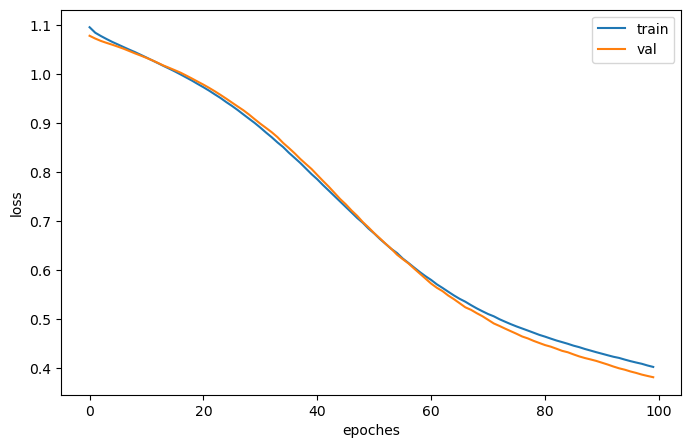

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()    

In [31]:
pred = model.predict(mms_X_test)
pred= pd.DataFrame(pred)
pred
# pred= pred[0].apply(lambda x: 1 if x > 0.5 else 0)
# print(classification_report(y_test, pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,0,1,2
0,0.012389,0.570787,0.416824
1,0.975319,0.000138,0.024543
2,0.012560,0.318724,0.668716
3,0.016113,0.502147,0.481740
4,0.011510,0.534538,0.453952
5,0.948288,0.000772,0.050940
6,0.018812,0.544077,0.437111
7,0.017874,0.332792,0.649334
8,0.019716,0.488977,0.491307
9,0.015944,0.570996,0.413059
